In [42]:
import chess.pgn
import pandas as pd

def process_pgn_with_moves(file_path, num_games=5000):
    games = []
    with open(file_path) as pgn:
        for i in range(num_games):
            game = chess.pgn.read_game(pgn)
            if game is None:
                break
            try:
                # Extract moves
                moves = " ".join([move.uci() for move in game.mainline_moves()])
                move_count = len(list(game.mainline_moves()))
            except Exception as e:
                # Handle cases where moves are not available
                moves = None
                move_count = 0

            # Append game details
            games.append({
                "White": game.headers.get("White", "Unknown"),
                "Black": game.headers.get("Black", "Unknown"),
                "Result": game.headers.get("Result", "Unknown"),
                "Opening": game.headers.get("Opening", "Unknown"),
                "WhiteElo": game.headers.get("WhiteElo", "Unknown"),
                "BlackElo": game.headers.get("BlackElo", "Unknown"),
                "TimeControl": game.headers.get("TimeControl", "Unknown"),
                "MoveCount": move_count,
                "Moves": moves
            })
    return pd.DataFrame(games)

# Provide the PGN file path
pgn_file_path = "/Users/vedantpramodwagh/Documents/VC/lichess_db_standard_rated_2013-07.pgn"

# Process the PGN file
df = process_pgn_with_moves(pgn_file_path)
df.to_csv("chess_games_with_moves.csv", index=False)
print("Dataset with moves saved!")


Dataset with moves saved!


In [43]:
# Clean the data
df = pd.read_csv('/Users/vedantpramodwagh/Documents/VC/chess_games_raw.csv')
df.head()

,White,Black,Result,Opening,WhiteElo,BlackElo,TimeControl,MoveCount,AverageElo,EloBracket
0,dragansimic1946,aicho,0-1,Benoni Defense: Benoni Gambit Accepted,1685,1577.0,300+0,26,1631.0,Advanced
1,mchelken,dipo_a,1-0,French Defense: Knight Variation,1616,1421.0,180+0,33,1518.5,Intermediate
2,el_panuelo,Exotile,1-0,Mieses Opening,1629,2001.0,60+0,83,1815.0,Advanced
3,akner92val,dragansimic1946,1-0,Giuoco Piano,1562,1709.0,300+0,9,1635.5,Advanced
4,Beijamim,trom,0-1,East Indian Defense,1593,1761.0,180+0,90,1677.0,Advanced


In [9]:
# Convert Elo rating to numeric and calculate average Elo
df['WhiteElo'] = pd.to_numeric(df['WhiteElo'], errors='coerce')
df['BlackElo'] = pd.to_numeric(df['BlackElo'], errors='coerce')
df['AverageElo'] = (df['WhiteElo'] + df['BlackElo']) / 2

In [12]:
# Categorize ELO rating into skills level
df['EloBracket'] = pd.cut(df['AverageElo'],bins = [0,1200,1600,2000,2400,2600],
                         labels = ['Beginner', 'Intermediate','Advanced','Expert','Master'])

# drop missing value
df.dropna(inplace = True)
df.head()

,White,Black,Result,Opening,WhiteElo,BlackElo,TimeControl,MoveCount,AverageElo,EloBracket
0,dragansimic1946,aicho,0-1,Benoni Defense: Benoni Gambit Accepted,1685,1577.0,300+0,26,1631.0,Advanced
1,mchelken,dipo_a,1-0,French Defense: Knight Variation,1616,1421.0,180+0,33,1518.5,Intermediate
2,el_panuelo,Exotile,1-0,Mieses Opening,1629,2001.0,60+0,83,1815.0,Advanced
3,akner92val,dragansimic1946,1-0,Giuoco Piano,1562,1709.0,300+0,9,1635.5,Advanced
4,Beijamim,trom,0-1,East Indian Defense,1593,1761.0,180+0,90,1677.0,Advanced


In [44]:
df.to_csv('/Users/vedantpramodwagh/Documents/VC/chess_games_raw.csv', index=False)
print("Cleaned data saved!")


Cleaned data saved!


In [15]:
# Analyze

popular_openings = df['Opening'].value_counts().head(10)
popular_openings

Opening
Van't Kruijs Opening                144
Modern Defense                      110
Horwitz Defense                     109
French Defense: Knight Variation     86
Queen's Pawn Game #2                 78
Philidor Defense #3                  74
Sicilian Defense: Bowdler Attack     74
Caro-Kann Defense                    72
Hungarian Opening                    71
Bishop's Opening                     67
Name: count, dtype: int64

In [16]:
# Win rates by openings
opening_success = df.groupby('Opening')['Result'].value_counts(normalize=True).unstack()
opening_success['WhiteWinRate'] = opening_success.get('1-0',0)
opening_success['BlackWinRate'] = opening_success.get('0-1',0)
print('Win Rate by Openings:')
print(opening_success[['WhiteWinRate','BlackWinRate']].head(10))

Win Rate by Openings:
Result                                              WhiteWinRate  BlackWinRate
Opening                                                                       
Alekhine Defense                                        0.666667      0.333333
Alekhine Defense #2                                     0.750000      0.250000
Alekhine Defense: Balogh Variation                           NaN      1.000000
Alekhine Defense: Four Pawns Attack, Trifunovic...      1.000000           NaN
Alekhine Defense: John Tracy Gambit                          NaN      1.000000
Alekhine Defense: Krejcik Variation                          NaN      1.000000
Alekhine Defense: Maroczy Variation                     1.000000           NaN
Alekhine Defense: Modern Variation, Main Line           0.333333      0.666667
Alekhine Defense: Normal Variation                      1.000000           NaN
Alekhine Defense: Saemisch Attack                       1.000000           NaN


In [19]:
# Elo Trend Analysis
df['GameNumber'] = range(1, len(df) + 1)
elo_trend = df.groupby('GameNumber')['AverageElo'].mean()
print("Elo Trend Calculated!")
elo_trend
df

Elo Trend Calculated!


,White,Black,Result,Opening,WhiteElo,BlackElo,TimeControl,MoveCount,AverageElo,EloBracket,GameNumber
0,dragansimic1946,aicho,0-1,Benoni Defense: Benoni Gambit Accepted,1685,1577.0,300+0,26,1631.0,Advanced,1
1,mchelken,dipo_a,1-0,French Defense: Knight Variation,1616,1421.0,180+0,33,1518.5,Intermediate,2
2,el_panuelo,Exotile,1-0,Mieses Opening,1629,2001.0,60+0,83,1815.0,Advanced,3
3,akner92val,dragansimic1946,1-0,Giuoco Piano,1562,1709.0,300+0,9,1635.5,Advanced,4
4,Beijamim,trom,0-1,East Indian Defense,1593,1761.0,180+0,90,1677.0,Advanced,5
...,...,...,...,...,...,...,...,...,...,...,...
4995,DGK,aristov,1-0,Horwitz Defense,1318,1380.0,360+0,53,1349.0,Intermediate,4995
4996,AlwaysWinner,Lefler,1-0,Petrov's Defense,1544,1513.0,240+0,71,1528.5,Intermediate,4996
4997,axlj2013,Kimon,1-0,Bishop's Opening: Boi Variation,1661,1551.0,300+7,65,1606.0,Advanced,4997
4998,jaro,goebbels,0-1,Philidor Defense #3,1530,1641.0,300+1,74,1585.5,Intermediate,4998


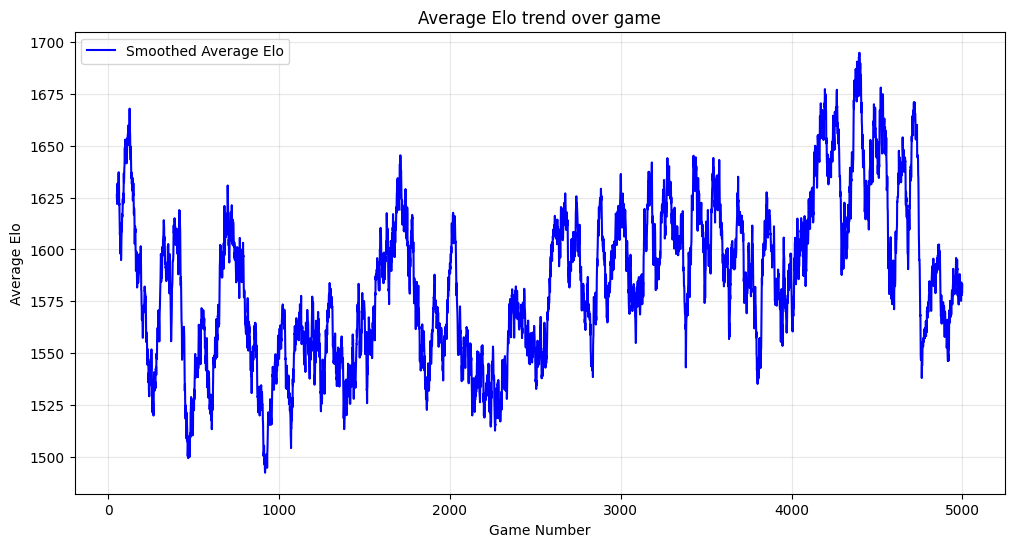

In [21]:
# Create Visualizations
# Elo trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(elo_trend.rolling(window=50).mean(),label='Smoothed Average Elo',color = 'blue')
plt.title('Average Elo trend over game')
plt.xlabel('Game Number')
plt.ylabel('Average Elo')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [25]:
# Popular Openings Bar chart

import plotly.express as px

fig_openings = px.bar(
popular_openings,
title = 'Top 10 best popular opening',
labels ={'index':'Opening','Value':'Gamesplayed'})
fig_openings.show()